# Depression Analysis

### 1. Introduction
The primary objective of this analysis is to identify key factors contributing to depression and gain insights into the relationships between variables in the dataset. The dataset includes various features, such as demographic information, academic or work-related stressors, and lifestyle habits. These features were analyzed to uncover patterns and their potential influence on depression.

In [905]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Using consistent styles, colors, and labels.
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

# Load data
data = pd.read_csv('final_depression_dataset_1.csv')

data

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,NaN,2.0,NaN,NaN,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,NaN,3.0,NaN,NaN,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,NaN,4.0,NaN,NaN,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,NaN,1.0,NaN,NaN,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,NaN,3.0,NaN,NaN,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,NaN,1.0,NaN,NaN,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,NaN,2.0,NaN,NaN,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


### 2. Data Preperation
Handling Missing Values:
* Numerical columns were imputed using the mean, and categorical columns with missing values were replaced with either the mode or a placeholder category ("Unknown").

Feature Encoding:
* Categorical variables were encoded into numerical representations using label encoding as appropriate.
Special attention was paid to numerically categorical variables, which were treated carefully to retain their categorical meaning.

In [907]:
# Percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage

Name                                      0.000000
Gender                                    0.000000
Age                                       0.000000
City                                      0.000000
Working Professional or Student           0.000000
Profession                               26.330203
Academic Pressure                        80.359937
Work Pressure                            19.640063
CGPA                                     80.359937
Study Satisfaction                       80.359937
Job Satisfaction                         19.640063
Sleep Duration                            0.000000
Dietary Habits                            0.000000
Degree                                    0.000000
Have you ever had suicidal thoughts ?     0.000000
Work/Study Hours                          0.000000
Financial Stress                          0.000000
Family History of Mental Illness          0.000000
Depression                                0.000000
dtype: float64

With 80% of some collumns being null we will just drop them from the data entirely. Using the 50% threshhold we will drop all data that is more than 50% null, the rest will be filled to properly analyze. 

In [909]:
# Drop columns with more than 50% null values
valid_columns = data.columns[data.isnull().sum() / len(data) < 0.5]
data = data.loc[:, valid_columns]
data

,Name,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Pooja,Female,37,Ghaziabad,Working Professional,Teacher,2.0,4.0,7-8 hours,Moderate,MA,No,6,2,No,No
1,Reyansh,Male,60,Kalyan,Working Professional,Financial Analyst,4.0,3.0,5-6 hours,Unhealthy,B.Com,Yes,0,4,Yes,No
2,Manvi,Female,42,Bhopal,Working Professional,Teacher,2.0,3.0,5-6 hours,Moderate,M.Com,No,0,2,No,No
3,Isha,Female,44,Thane,Working Professional,Teacher,3.0,5.0,7-8 hours,Healthy,MD,Yes,1,2,Yes,No
4,Aarav,Male,48,Indore,Working Professional,UX/UI Designer,4.0,3.0,7-8 hours,Moderate,BE,Yes,6,5,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,Raghavendra,Male,25,Bangalore,Working Professional,Consultant,1.0,5.0,5-6 hours,Healthy,BBA,Yes,12,3,Yes,No
2552,Pihu,Female,23,Pune,Working Professional,Teacher,3.0,1.0,Less than 5 hours,Moderate,MA,Yes,8,3,No,Yes
2553,Sara,Female,24,Srinagar,Working Professional,HR Manager,1.0,4.0,Less than 5 hours,Moderate,BA,Yes,4,4,No,No
2554,Eshita,Female,56,Bangalore,Working Professional,Business Analyst,2.0,3.0,7-8 hours,Healthy,BBA,No,4,5,Yes,No


In [910]:
# Dropping Name from analysis because it has no analytical significance
data.drop('Name', axis=1, inplace=True)

# Replacing numeric categorical data to categorical
data['Work Pressure'] = data['Work Pressure'].map({1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'})
data['Job Satisfaction'] = data['Job Satisfaction'].map({1: 'Strongly Disagree', 2: 'Disagree', 3: 'Neutral', 4: 'Agree', 5: 'Strongly Agree'})

# Replacing categorical null values with a 'Unknown" category
data['Profession'] = data['Profession'].fillna('Unknown')
data['Work Pressure'] = data['Work Pressure'].fillna('Unknown')
data['Job Satisfaction'] = data['Job Satisfaction'].fillna('Unknown')

# Converting categorical columns to numerical values
data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
data['Working Professional or Student'] = data['Working Professional or Student'].map({ 'Student': 1, 'Working Professional': 0})  
data['Depression'] = data['Depression'].map({'Yes': 1, 'No': 0})
data['Family History of Mental Illness'] = data['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
data['Suicidal Thoughts'] = data['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})

# Cleaning sleep_duration by averaging the values
sleep_duration_mapping = {
    "7-8 hours": 7.5,
    "5-6 hours": 5.5,
    "Less than 5 hours": 4.5,
    "More than 8 hours": 8.5
}

# Map text values to numerical values
data['Sleep Duration'] = data['Sleep Duration'].map(sleep_duration_mapping)

data

,Gender,Age,City,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,Suicidal Thoughts
0,0,37,Ghaziabad,0,Teacher,Disagree,Agree,7.5,Moderate,MA,No,6,2,0,0,0
1,1,60,Kalyan,0,Financial Analyst,Agree,Neutral,5.5,Unhealthy,B.Com,Yes,0,4,1,0,1
2,0,42,Bhopal,0,Teacher,Disagree,Neutral,5.5,Moderate,M.Com,No,0,2,0,0,0
3,0,44,Thane,0,Teacher,Neutral,Strongly Agree,7.5,Healthy,MD,Yes,1,2,1,0,1
4,1,48,Indore,0,UX/UI Designer,Agree,Neutral,7.5,Moderate,BE,Yes,6,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,1,25,Bangalore,0,Consultant,Strongly Disagree,Strongly Agree,5.5,Healthy,BBA,Yes,12,3,1,0,1
2552,0,23,Pune,0,Teacher,Neutral,Strongly Disagree,4.5,Moderate,MA,Yes,8,3,0,1,1
2553,0,24,Srinagar,0,HR Manager,Strongly Disagree,Agree,4.5,Moderate,BA,Yes,4,4,0,0,1
2554,0,56,Bangalore,0,Business Analyst,Disagree,Neutral,7.5,Healthy,BBA,No,4,5,1,0,0


In [911]:
# Check for missing values
null_data_count = data.isnull().sum()
null_data_count

Gender                                   0
Age                                      0
City                                     0
Working Professional or Student          0
Profession                               0
Work Pressure                            0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
Suicidal Thoughts                        0
dtype: int64

with the data now clean we are ready to explore the data for analysis

In [913]:
# Selecting numeric columns
numeric_data = data.select_dtypes(include=[np.number])
# Select all categorical columns
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

### 3. Exploratory Data Analysis (EDA)
Univariate Analysis:
* Histograms and boxplots were used to understand the distribution of numerical variables.
* Categorical variables were visualized using bar plots, highlighting the frequency distribution of categories.

Bivariate Analysis:
* Correlations between numerical features and the target variable (Depression) were calculated and visualized using a heatmap and bar charts.
* Scatterplots and pairplots were used to identify relationships between numerical features.

Key Findings:
* Features such as Work Pressure, Financial Stress, and Sleep Duration showed notable relationships with depression.
* Categorical features like Profession and Degree highlighted disparities in depression rates across groups.

In [915]:
# Create a summary DataFrame
summary = pd.DataFrame({
    "Non-Null Count": data.notnull().sum(),
    "Data Type": data.dtypes,
    "Unique Values": data.nunique()
})

# Display the summary
summary

,Non-Null Count,Data Type,Unique Values
Gender,2556,int64,2
Age,2556,int64,43
City,2556,object,30
Working Professional or Student,2556,int64,2
Profession,2556,object,36
Work Pressure,2556,object,6
Job Satisfaction,2556,object,6
Sleep Duration,2556,float64,4
Dietary Habits,2556,object,3
Degree,2556,object,27


In [916]:
# Transforming objects into 

describe_data = data.describe().T
describe_data

,count,mean,std,min,25%,50%,75%,max
Gender,2556.0,0.521518,0.499635,0.0,0.0,1.0,1.0,1.0
Age,2556.0,39.043036,12.260596,18.0,28.0,39.0,50.0,60.0
Working Professional or Student,2556.0,0.196401,0.397353,0.0,0.0,0.0,0.0,1.0
Sleep Duration,2556.0,6.491393,1.578452,4.5,4.5,7.5,7.5,8.5
Work/Study Hours,2556.0,6.023865,3.771743,0.0,3.0,6.0,9.0,12.0
Financial Stress,2556.0,2.968701,1.415527,1.0,2.0,3.0,4.0,5.0
Family History of Mental Illness,2556.0,0.487089,0.499931,0.0,0.0,0.0,1.0,1.0
Depression,2556.0,0.178013,0.382598,0.0,0.0,0.0,0.0,1.0
Suicidal Thoughts,2556.0,0.488654,0.499969,0.0,0.0,0.0,1.0,1.0


In [917]:
# Range (max - min)
data_range = data.max(numeric_only=True) - data.min(numeric_only=True)
print("Range:\n", data_range)

# Variance
data_variance = data.var(numeric_only=True)
print("Variance:\n", data_variance)

# Skewness (asymmetry of data distribution)
data_skewness = data.skew(numeric_only=True)
print("Skewness:\n", data_skewness)

# Kurtosis (tail heaviness)
data_kurtosis = data.kurt(numeric_only=True)
print("Kurtosis:\n", data_kurtosis)


Range:
 Gender                               1.0
Age                                 42.0
Working Professional or Student      1.0
Sleep Duration                       4.0
Work/Study Hours                    12.0
Financial Stress                     4.0
Family History of Mental Illness     1.0
Depression                           1.0
Suicidal Thoughts                    1.0
dtype: float64
Variance:
 Gender                                0.249635
Age                                 150.322218
Working Professional or Student       0.157889
Sleep Duration                        2.491511
Work/Study Hours                     14.226045
Financial Stress                      2.003717
Family History of Mental Illness      0.249931
Depression                            0.146381
Suicidal Thoughts                     0.249969
dtype: float64
Skewness:
 Gender                             -0.086202
Age                                -0.005077
Working Professional or Student     1.529307
Sleep Duratio

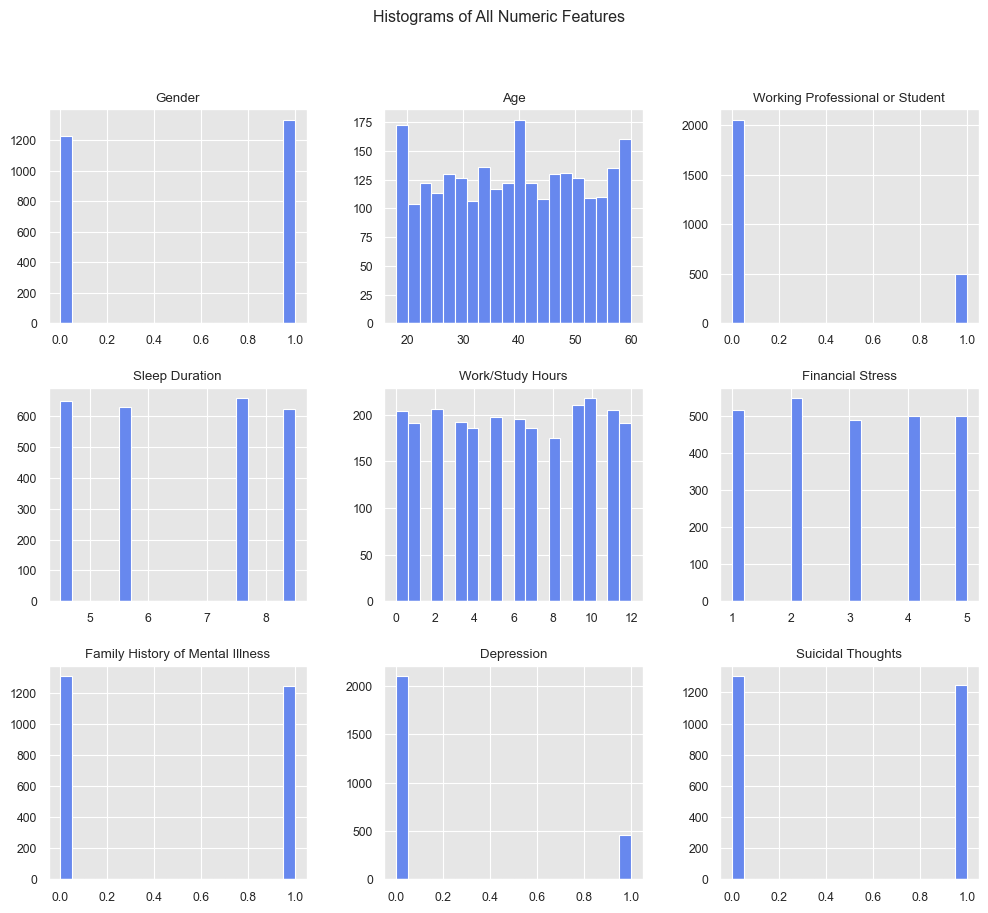

In [918]:
# Visual representation shows skew in both student and depression.
# Plot histograms for numeric columns
data.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of All Numeric Features")
plt.show()

#### Key Takeaways
* Gender: at 52% giving us a balanced dataset.
* Age: range from 18- 60 also giving us a blanced dataset of just adults. Though skewed slightly to older individuals.
* Working Professional/Student: skewed 80% towards Working Professionals. Students will be slightly underrepresented in this dataset.
* Depression: 17.8% of the population has been marked as having depression. The low percenate may require techniques like oversampling, undersampling, or class-weight adjustments if building predictive models.
* Suicidal Thoughts: Around 48.9% of the participants have had suicidal thoughts, significantly higher than the prevalence of depression. This suggests a potential overlap but not a direct 1:1 relationship between suicidal thoughts and depression.
* Family History of Mental Illness: Around 48.7% of participants reported a family history of mental illness, which could be a key risk factor in analysis.
* Work Pressure: Feature with high variablility.
* Sleep Duration: with the mean being 6.49 hours, indicating that the average participant sleeps less than the recommended 7–8 hours. A potential factor for poor mental health.
* Work/Study Hours: Wide range of values with a mean of 6.02 hours per day. Would need further analysis.
* Financial Stress: with a mean of 2.97 on a 5-point scale, indicating moderate financial stress on average.
* Categorical features: Profession, Dietary Habits and Degree will be analyzed later in the notebook.

Next we will explore the numerical variables to see if there are any stand out using a heatmap

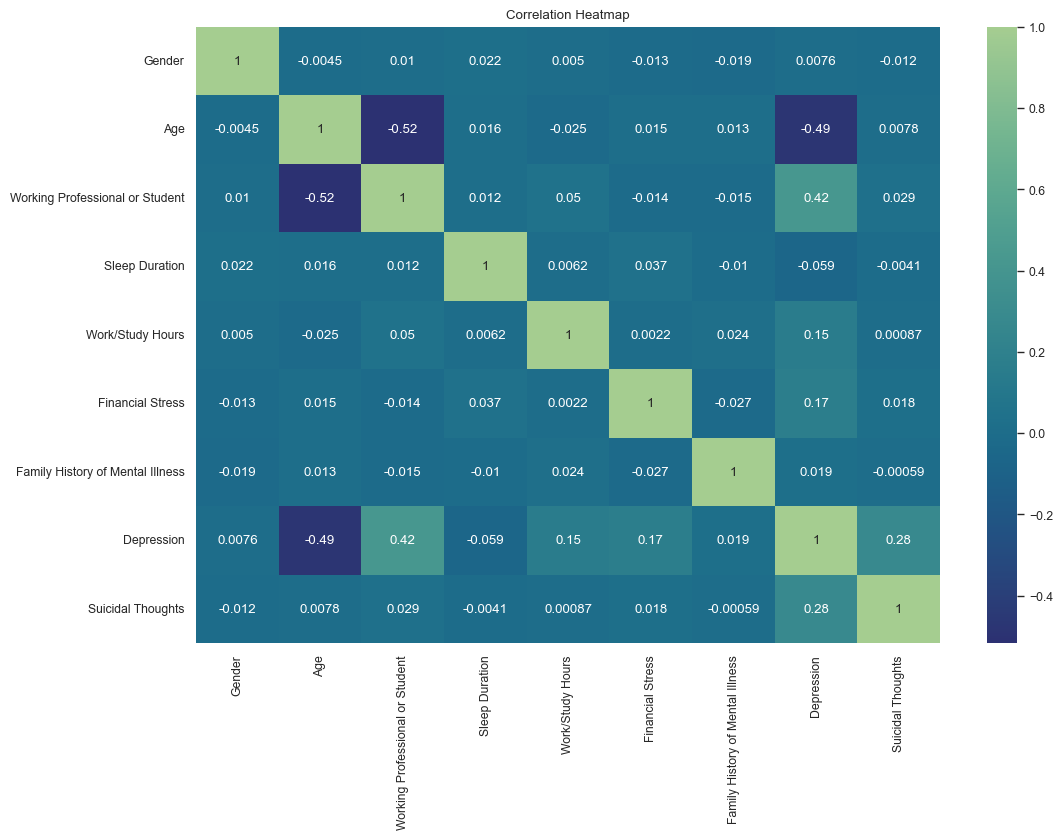

In [920]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='crest_r')
plt.title('Correlation Heatmap')
plt.show()

Looking at the heatmap it is clear that Depression has
* a medium negative correlation to Age, and Working Professional. 
* a small positive correlation to Suicidal Thoughts.

#### Age Exploration

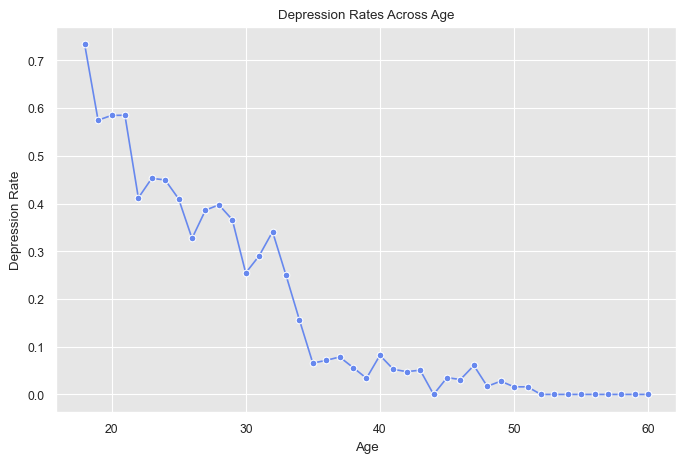

In [923]:
# Calculate depression rates for each age
age_depression_rates = data.groupby('Age')['Depression'].mean()

# Plot depression rates over age
plt.figure(figsize=(8, 5))
sns.lineplot(x=age_depression_rates.index, y=age_depression_rates.values, marker='o')
plt.title('Depression Rates Across Age')
plt.xlabel('Age')
plt.ylabel('Depression Rate')
plt.show()

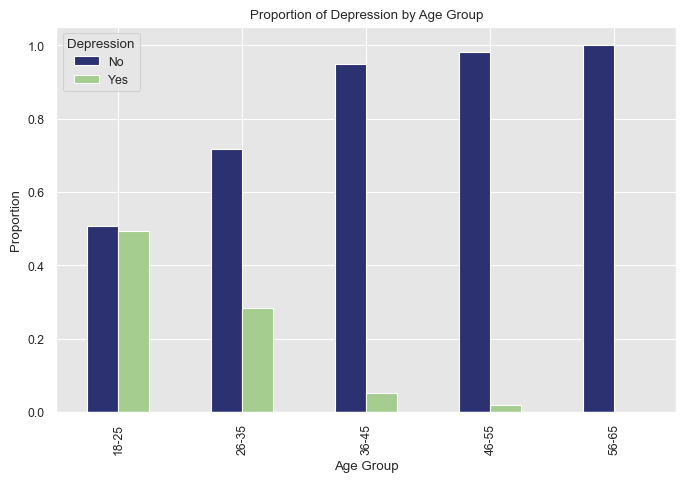

In [924]:
# Create Age Groups for better visualization
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Create a count table for Age Group and Depression
age_depression_counts = pd.crosstab(data['Age Group'], data['Depression'], normalize='index')

# Plot stacked bar chart
age_depression_counts.plot(kind='bar', figsize=(8, 5), colormap='crest_r')
plt.title('Proportion of Depression by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Proportion')
plt.legend(title='Depression', labels=['No', 'Yes'])
plt.show()


Age and Depression:
Depression rates are highest among individuals aged 18-25. This group may benefit from targeted mental health campaigns.

#### Exploration of Binary variables that were significant in correlation heatmap

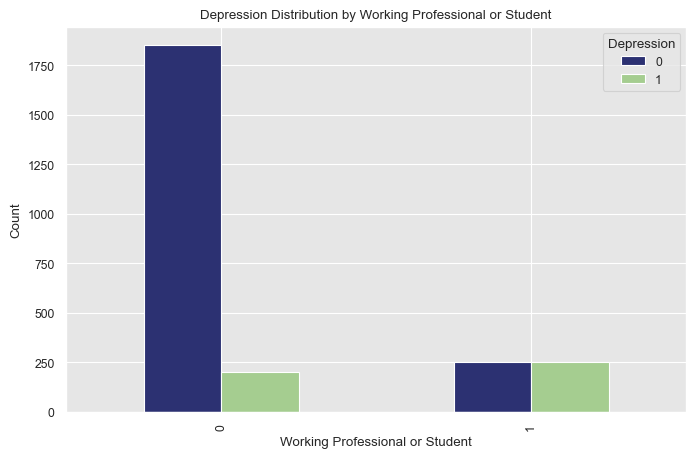

In [927]:
# Plot depression rates for each binary variable

pd.crosstab(data['Working Professional or Student'], data['Depression']).plot(
        kind='bar', figsize=(8, 5), colormap='crest_r')
plt.title(f'Depression Distribution by Working Professional or Student')
plt.ylabel('Count')
plt.xlabel('Working Professional or Student')
plt.show()

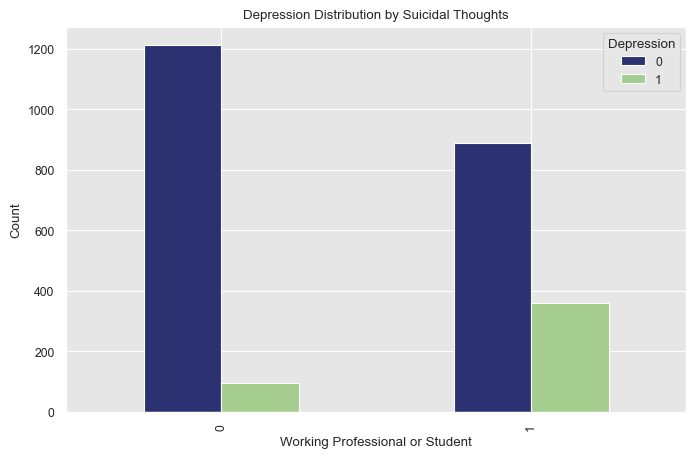

In [928]:
pd.crosstab(data['Suicidal Thoughts'], data['Depression']).plot(
        kind='bar', figsize=(8, 5), colormap='crest_r')
plt.title(f'Depression Distribution by Suicidal Thoughts')
plt.ylabel('Count')
plt.xlabel(col)
plt.show()

Expremely high ratio of Students in `Working or Student` distributed

Although Suicidal Thoughts is higher I would have assuemd there would be a much greater difference, this should be investigated futher

Lets explore more categorical data to find some possible correlations

In [930]:
def plot_depression_by_category(data, category_column, palette="viridis"):
    # Calculate depression percentage for each category in the specified column
    depression_percentage = data.groupby(category_column)['Depression'].mean().sort_values(ascending=False)
    
    # Get the ordered categories
    category_order = depression_percentage.index
    
    # Create the plot with the specified palette
    plt.figure(figsize=(12, 8))
    sns.countplot(y=category_column, hue='Depression', data=data, palette=palette, order=category_order)
    plt.legend(title="Depression", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title(f'Depression by {category_column} (Ordered by Depression Percentage)')
    plt.show()

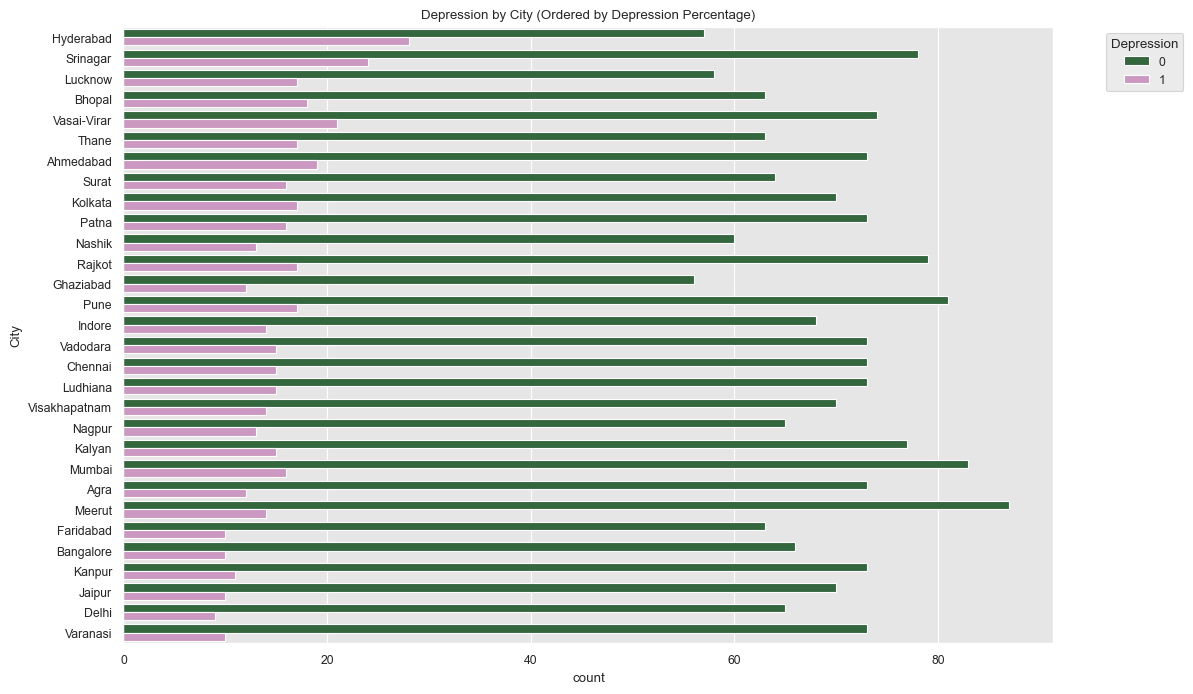

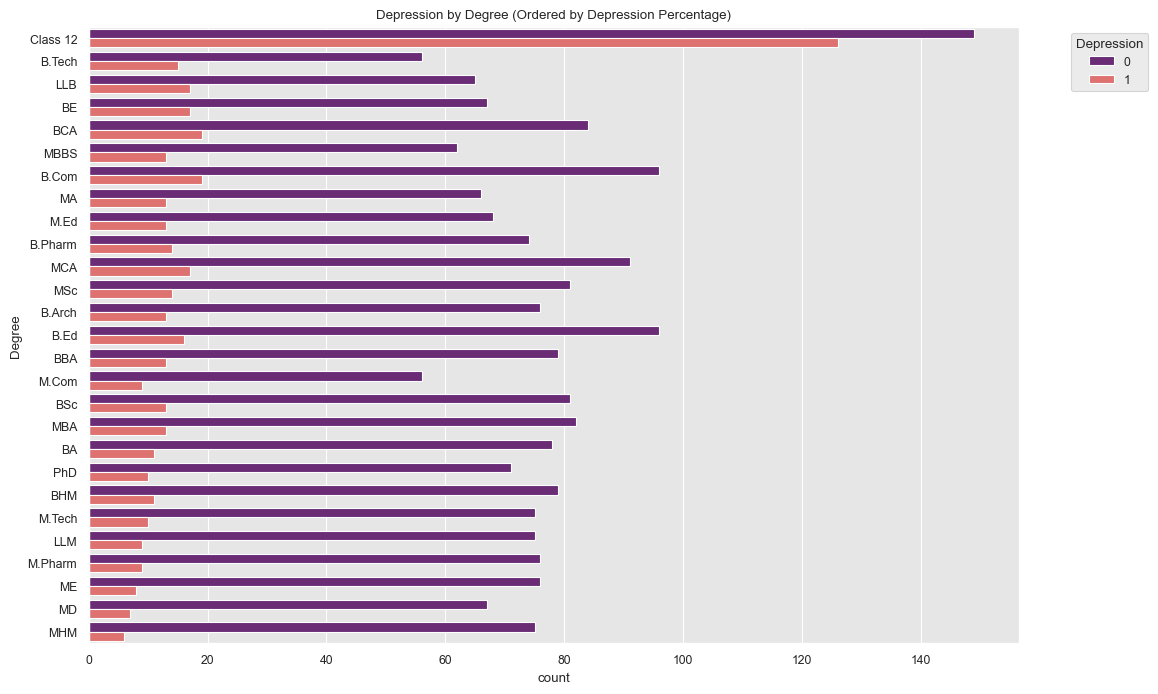

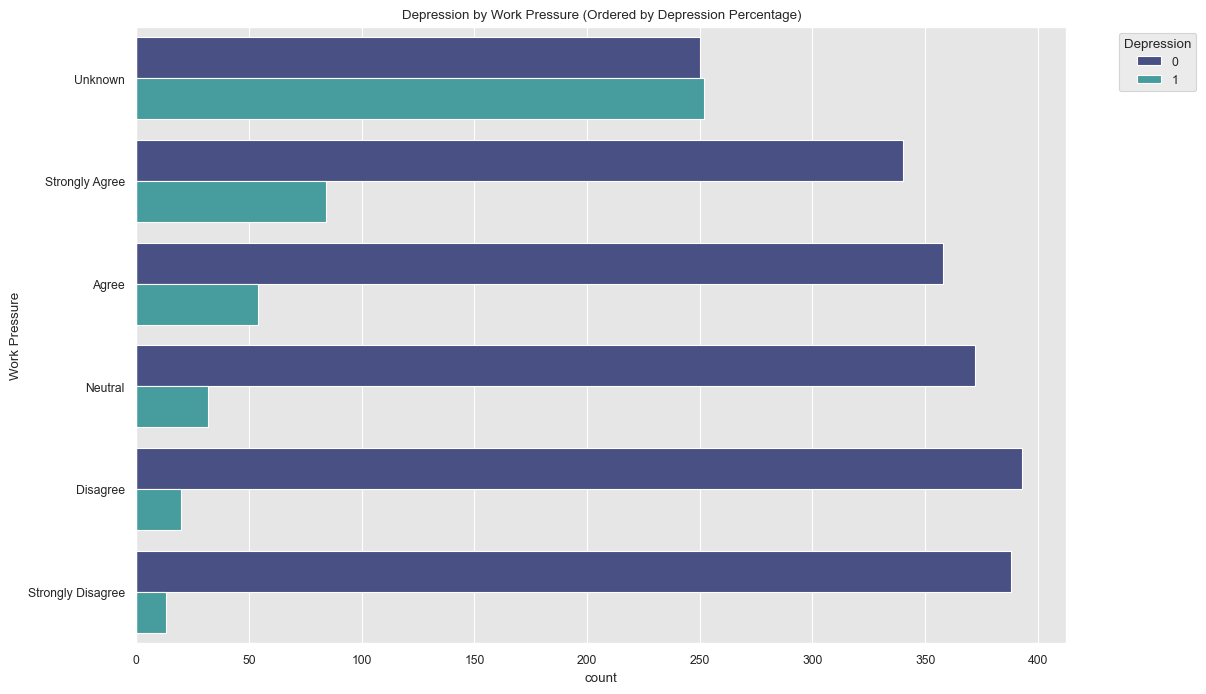

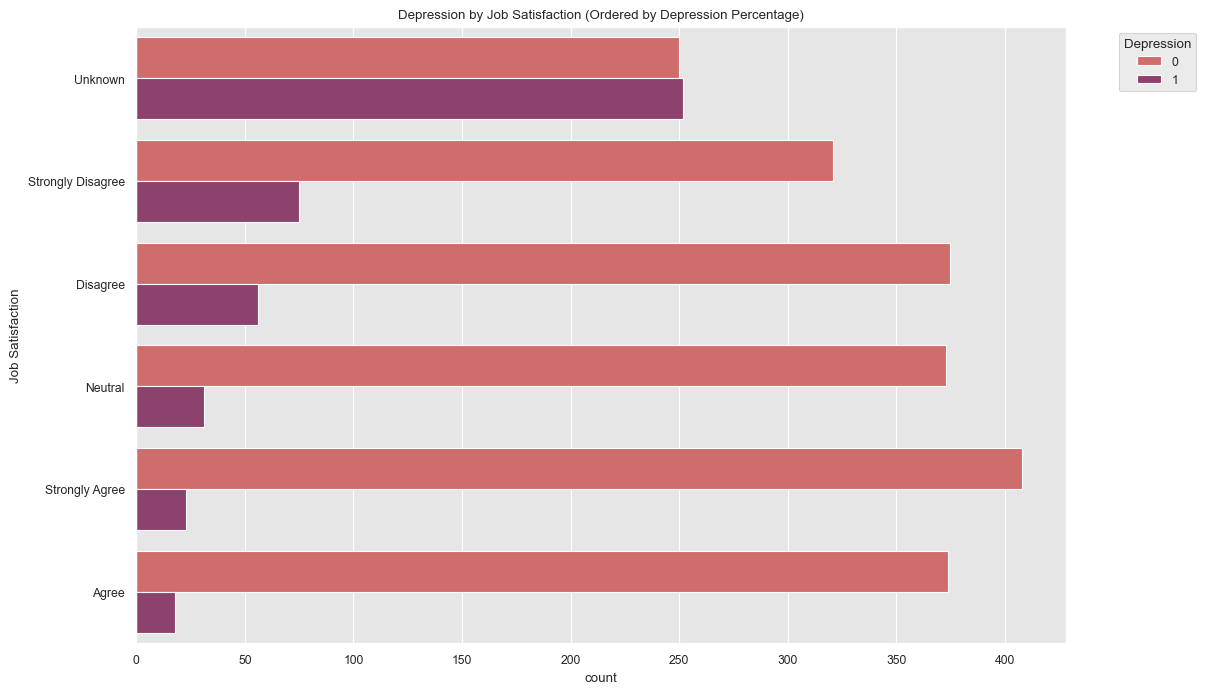

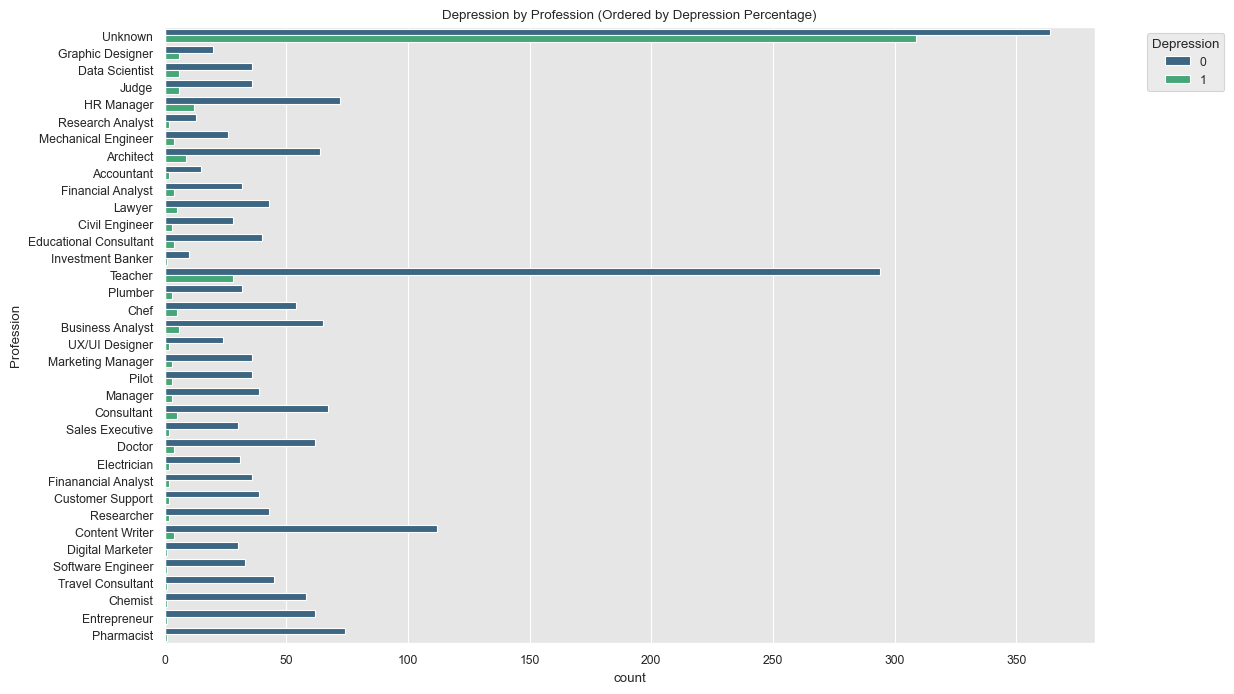

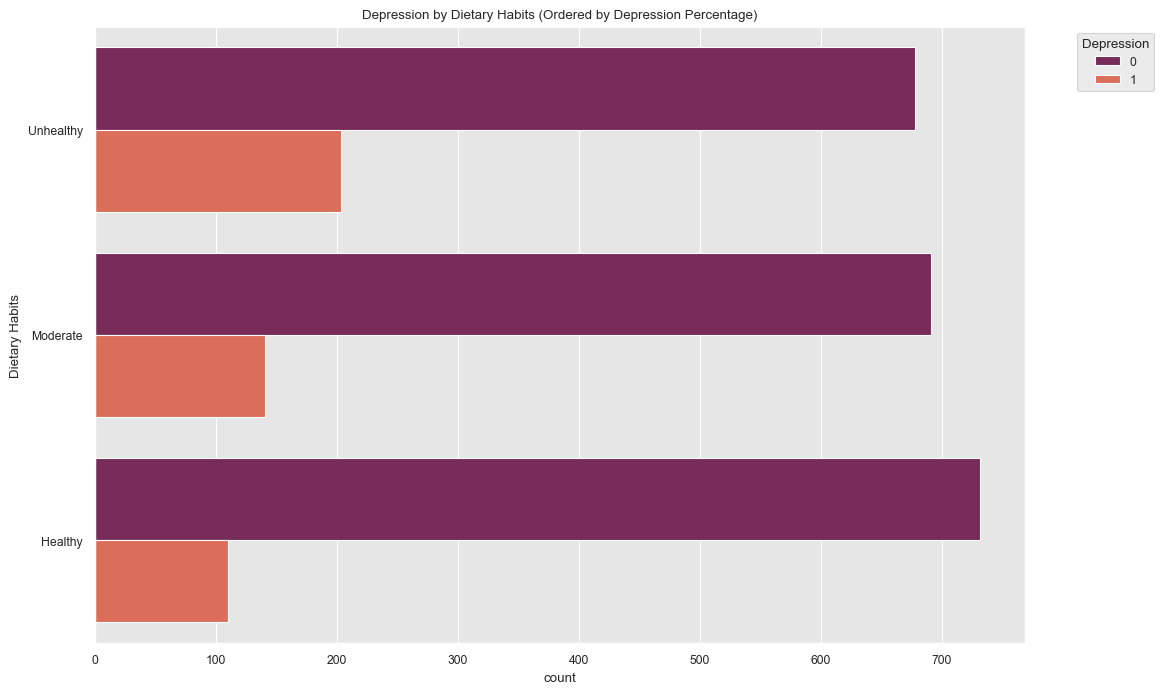

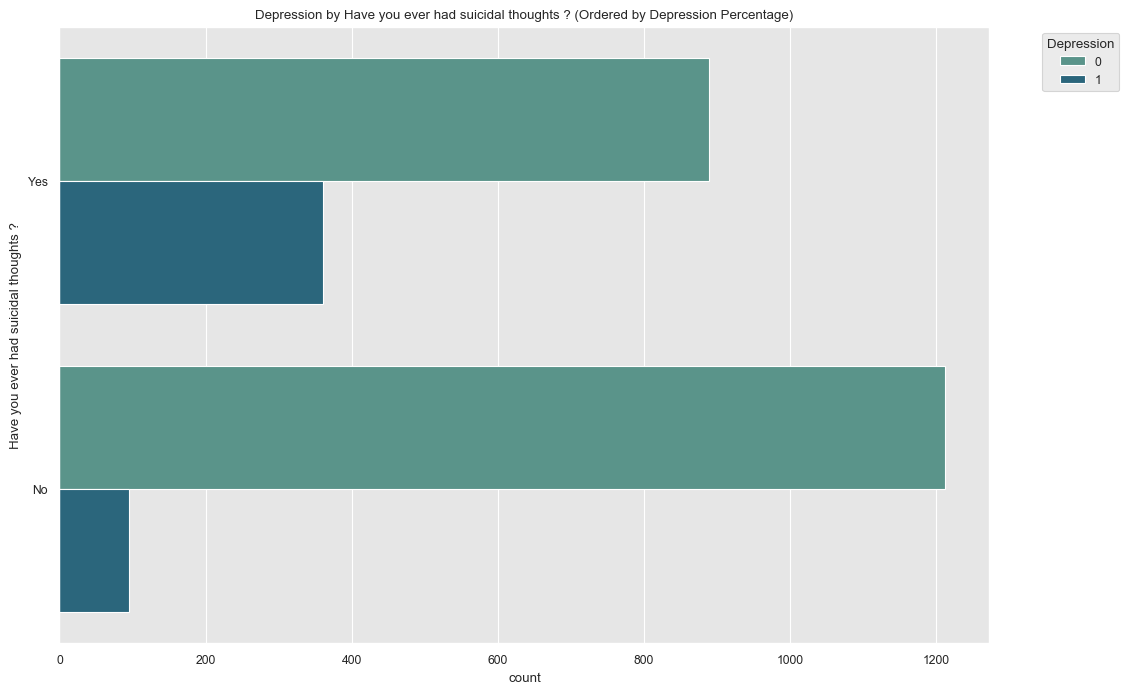

In [931]:
# List of categorical columns you want to analyze
categorical_columns = ['City','Degree', 'Work Pressure', 'Job Satisfaction', 'Profession','Dietary Habits','Have you ever had suicidal thoughts ?'] 

# Access the categorical data
categorical_data = data[categorical_columns]

# Color palettes for each plot
palettes = ["cubehelix", "magma", "mako", "flare", "viridis", "rocket", "crest"]

# Loop through each categorical column and generate the plot
for column, palette in zip(categorical_columns, palettes):
    plot_depression_by_category(data, column, palette=palette)


##### Key Takeaways from categorical exploration
* Some stand out categorical features highligted Hyderbad as the City with the highest percentage of depression.
* Class 12 or being in your final year of highscool was almost 1:1 in depression and a stand out in the Depression by Degree category.
* There was a strong percentage of depression by both Work Pressure and Job Satisfaction in people who did not have values 'Unknown', and people who answered a 5 on a 1-5 scale.
* Depression by Profession showed 'Unknown' again as an almost 1:1 for depression, this could be interpreted as people who are unemployed or were not willing to answer this question. The second most depression by Profession was Graphic Designer but this data sample would be much to small to assume anything about the overall group.
* Depression by Dietary habits had Unhealthy leading in depression percentage, but not by a significant amount.
* The category Have You Ever had Suicidal Thoughts ? suprised me by the No's still having some depression and the Yes only having half depression. Which makes sense, as suicidal thoughts are a direct indicator or correlate to mental health issues like depression.
* For Gender I wanted to isolate this for analysis because I had heard of significant differences in suicide by men and women. While ther was a difference it was very small, while analizing the age groups it became more clear that age was much more of a significant factor for depression.

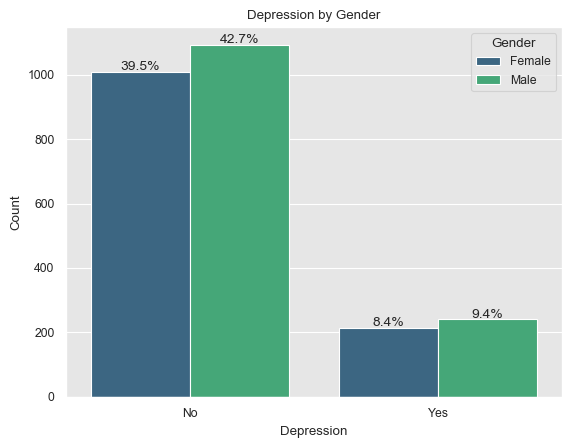

In [933]:
# 0=Female 1=Male
data['Gender'] = data['Gender'].replace({0: 'Female', 1: 'Male'})
data['Depression'] = data['Depression'].replace({0: 'No', 1: 'Yes'})
# Add percentage annotations
ax = sns.countplot(x='Depression', hue='Gender', palette='viridis', data=data)
plt.title('Depression by Gender')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.legend(title='Gender')

# Calculate percentages
total = len(data)
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 5,
                f'{(height / total * 100):.1f}%', ha='center', fontsize=10)
plt.show()

Observation:

Gender 0 Female and 1 Male both have more individuals without depression (Depression=0) than with depression (Depression=1).
The counts for Depression=0 are higher in both genders, but the disparity between depressed and non-depressed individuals is slightly larger for one gender (gender 1).
Key Insights:

Depression seems to affect both genders significantly, but one group (gender 0 or 1) might be slightly more prone to depression.
This can suggest potential gender-specific factors contributing to mental health challenges (e.g., societal, biological, or psychological influences).

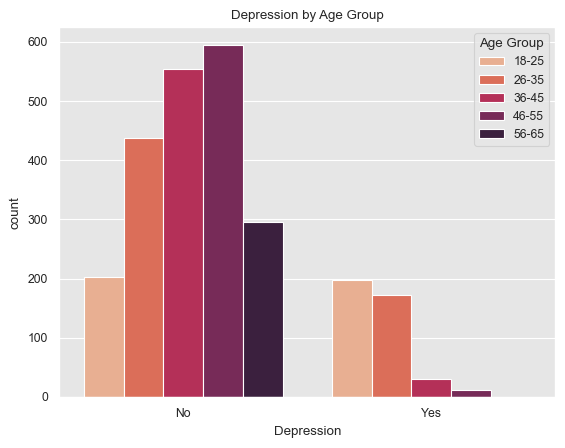

In [935]:
# Distribution of depression by age groups
data_age = data
data_age['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65'])
sns.countplot(x='Depression', hue='Age Group', palette='rocket_r', data=data)
plt.title('Depression by Age Group')
plt.show()


Observation:

Individuals aged 18-25 and 26-35 (younger groups) have higher counts of depression (Depression=1) compared to older groups.
The older age groups (e.g., 46-55 and 56-65) show significantly fewer individuals with depression.
Across all age groups, the number of non-depressed individuals (Depression=0) is consistently higher than those with depression.
Key Insights:

Younger age groups, particularly 18-25 and 26-35, seem to have a higher proportion of depressed individuals. This could be due to factors like academic pressure, career instability, or lack of social support.
Depression prevalence decreases with age, suggesting that older age groups might have better coping mechanisms, more stable lifestyles, or less exposure to certain stressors.

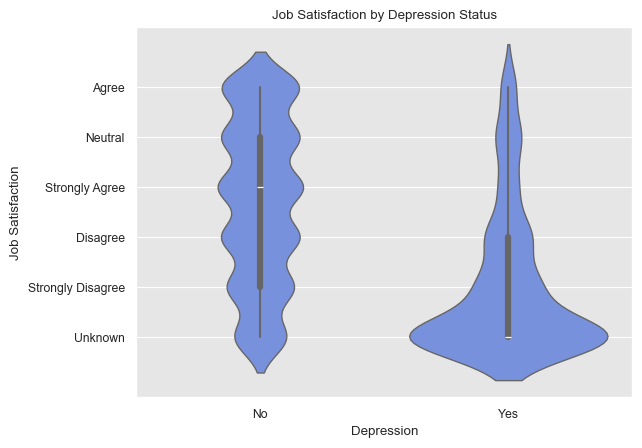

In [937]:
sns.violinplot(x='Depression', y='Job Satisfaction', data=data)
plt.title('Job Satisfaction by Depression Status')
plt.show()

### 4. Statistical Analysis
Chi-Square Test:
* The chi-square test was applied to categorical features to evaluate their association with depression.
* Results showed significant relationships for features like Family History of Mental Illness and Gender.

Mutual Information:
* Mutual information scores were computed for categorical features, revealing their dependency on the target variable.

In [939]:
from scipy.stats import chi2_contingency

data['Depression'] = data['Depression'].map({'Yes': 1, 'No': 0})
sig_corr_columns = ['Working Professional or Student', 'Suicidal Thoughts']

for col in sig_corr_columns:
    # Create a contingency table
    contingency_table = pd.crosstab(data[col], data['Depression'])
    
    # Perform chi-square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"{col}:")
    print(f"Chi-Square Test: chi2={chi2:.2f}, p-value={p:.4f}")
    print("-" * 40)

Working Professional or Student:
Chi-Square Test: chi2=445.36, p-value=0.0000
----------------------------------------
Suicidal Thoughts:
Chi-Square Test: chi2=201.32, p-value=0.0000
----------------------------------------


In [940]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features and target
X = data[sig_corr_columns]
y = data['Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Print feature importance (coefficients)
coefficients = pd.DataFrame({
    'Feature': sig_corr_columns,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', ascending=False)
print(coefficients)

                           Feature  Coefficient
0  Working Professional or Student     2.442967
1                Suicidal Thoughts     1.913833


In [941]:
# Correlation of features with Depression
target_corr = numeric_data.corr()['Depression'].sort_values(ascending=False)
print("Correlation with Depression:\n", target_corr)

Correlation with Depression:
 Depression                          1.000000
Working Professional or Student     0.418708
Suicidal Thoughts                   0.281669
Financial Stress                    0.165669
Work/Study Hours                    0.152465
Family History of Mental Illness    0.019182
Gender                              0.007595
Sleep Duration                     -0.059030
Age                                -0.485147
Name: Depression, dtype: float64


None of the variables are showing strong or even moderate correlation, but there are two strong negative correlations with Age and Being a Working Professional or student (0,1) . Meaning the younger you are the more likely you are to be depressed, and the same is true of being a student. This is shown in a more visual way in the next cell.

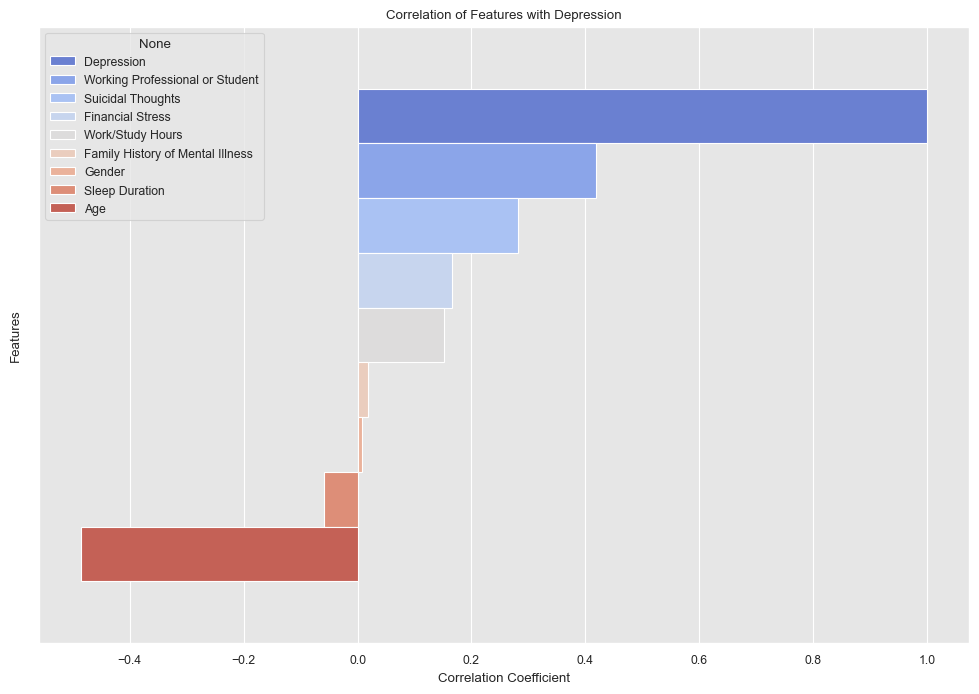

In [943]:
# Calculate correlations
target_corr = numeric_data.corr()['Depression'].sort_values(ascending=False)

# Plot as a bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=target_corr.values, hue=target_corr.index, palette="coolwarm", legend=True)
plt.title("Correlation of Features with Depression")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.show()

#### 5. Feature Selection

##### Chi-Square and Mutual Information:

    Statistical tests ranked features based on their relevance to `Depression`

##### Machine Learning-Based Importance:

    A Random Forest model was trained, and feature importance was derived, highlighting the most influential features.

In [945]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables as integers
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
encoded_data = data.copy()
encoder = LabelEncoder()
for col in categorical_columns:
    encoded_data[col] = encoder.fit_transform(encoded_data[col].astype(str))

# SelectKBest with Chi-Square
X = encoded_data.drop(columns=['Depression'])
y = encoded_data['Depression']
chi2_selector = SelectKBest(chi2, k='all').fit(X, y)
chi2_scores = pd.DataFrame({
    'Feature': X.columns,
    'Chi-Square Score': chi2_selector.scores_
}).sort_values(by='Chi-Square Score', ascending=False)
print(chi2_scores)


                                  Feature  Chi-Square Score
1                                     Age       2315.350399
4                              Profession       1256.607918
3         Working Professional or Student        360.099951
6                        Job Satisfaction        332.160345
15                              Age Group        235.244526
5                           Work Pressure        230.317554
11                       Work/Study Hours        140.261678
10  Have you ever had suicidal thoughts ?        103.693672
14                      Suicidal Thoughts        103.693672
12                       Financial Stress         47.330547
9                                  Degree         31.975052
8                          Dietary Habits         19.870746
7                          Sleep Duration          3.417174
2                                    City          1.412247
13       Family History of Mental Illness          0.482395
0                                  Gende

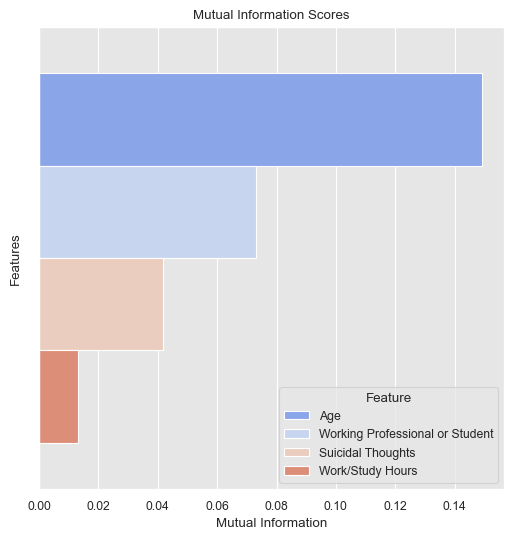

In [946]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

# Define the columns you want to analyze
most_sigificant_columns = ['Age', 'Work/Study Hours', 'Suicidal Thoughts', 'Working Professional or Student'] 

# Subset the data
X = data[most_sigificant_columns]
y = data['Depression']  # Target variable

# Convert categorical features to numeric (if necessary)
X = pd.get_dummies(X, drop_first=True)

# Compute Mutual Information for classification
mi_scores = mutual_info_classif(X, y, discrete_features=True)

# Create a DataFrame of scores
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)

# Plot MI scores
plt.figure(figsize=(6, 6))
sns.barplot(x='Mutual Information', hue='Feature', data=mi_df, palette="coolwarm")
plt.title('Mutual Information Scores')
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.show()


In [947]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Extract feature importance
rf_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
print(rf_importances)


                           Feature  Importance
0                              Age    0.524062
1                 Work/Study Hours    0.226170
2                Suicidal Thoughts    0.142723
3  Working Professional or Student    0.107045


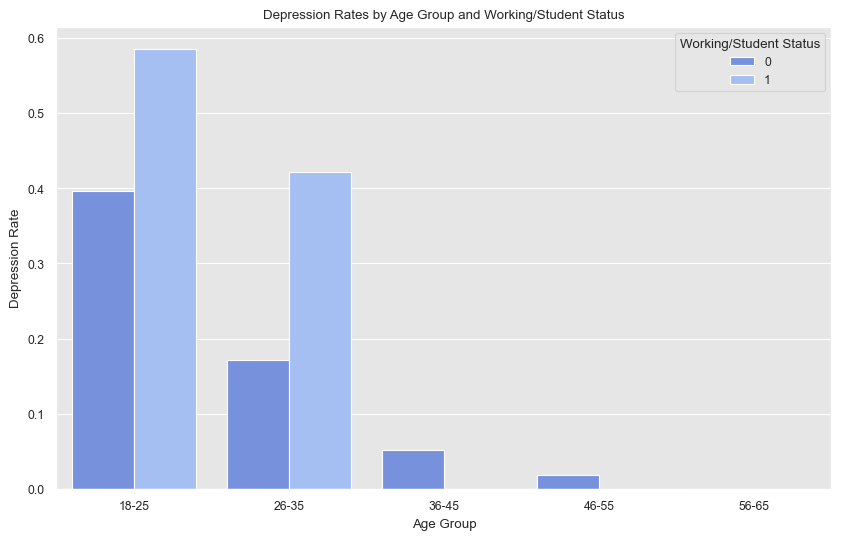

In [948]:
# Comparing highest ranked features
# Bin Age into groups
data['Age Group'] = pd.cut(data['Age'], bins=[18, 25, 35, 45, 55, 65], 
                           labels=['18-25', '26-35', '36-45', '46-55', '56-65'])

# Check unique categories for Working/Student status
# Grouped bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Group', y='Depression', hue='Working Professional or Student', data=data, errorbar=None)
plt.title('Depression Rates by Age Group and Working/Student Status')
plt.ylabel('Depression Rate')
plt.xlabel('Age Group')
plt.legend(title='Working/Student Status')
plt.show()

##### 5. Feature Selection Analysis:

Top 5 Key Features Identified with chi2:
highlights relationships but assumes independence.

`Age`

`Profession`

`Working Professional or Student`

`Job Satisfaction`

`Age Group`

Top Features Identified Across Methods:
Mutual Information: Captures both linear and non-linear dependencies.
Random Forest: Strong for identifying impactful features in a predictive model.

`Family History of Mental IllnessSuicidal Thoughts`

`Sleep Duration`

`Work/Study Hours`

`Financial Stress`


#### 6. Data Visualization
Several visualizations were employed to illustrate the findings:

* Heatmaps highlighted correlations between features.
* Bar plots ranked features based on importance scores.
* Violin plots and boxplots showcased variance in depression rates across categories.
* Pairplots and scatterplots revealed trends in numerical features.

#### 8. Conclusion
This analysis has identified key factors contributing to depression and offered actionable insights. The combination of statistical methods and machine learning techniques ensured a thorough examination of the data. By focusing on the highlighted features, policymakers, employers, and educators can design targeted strategies to address the factors contributing to mental health challenges.